In [1]:
import matplotlib.pyplot as plt
import numpy as np
import h5py
import os
from labellines import labelLine, labelLines

In [2]:
save_path = 'cell/ptychography/'
fname = 'data_cell_phase.h5'
f = h5py.File(os.path.join(save_path,fname))
prj = f['exchange/data']
print('dimension of the data from all angles all beam spots = ' + ', '.join(map(str,prj.shape)))

grid_delta = np.load('cell/ptychography/phantom/grid_delta.npy')
print('dimension of the sample = ' +', '.join(map(str,grid_delta.shape)))

n_sample_pixel = np.count_nonzero(grid_delta > 1e-10)
print('n_sample_pixel = %d' %n_sample_pixel)
print('finite support area ratio in sample = %.3f' %(n_sample_pixel/(grid_delta.shape[0]*grid_delta.shape[1])))

dimension of the data from all angles all beam spots = 1, 4488, 72, 72
dimension of the sample = 325, 325, 1
n_sample_pixel = 50918
finite support area ratio in sample = 0.482


In [3]:
n_ls = ['n1e4', 'n4e4', 'n1e5', 'n4e5', 'n1e6', 'n1.75e6', 'n4e6', 'n1e7', 'n1.75e7', 'n4e7', 'n1e8', 'n1.75e8', 'n4e8']
n_ph_ls = []
for n_ph_tx in n_ls:
    n_ph_tx = n_ph_tx[1:]
    n_ph = float(n_ph_tx)/n_sample_pixel
    print(n_ph)
    n_ph_ls.append(n_ph)

0.19639420244314387
0.7855768097725755
1.9639420244314387
7.855768097725755
19.639420244314387
34.36898542755018
78.55768097725755
196.39420244314388
343.6898542755018
785.5768097725755
1963.9420244314388
3436.898542755018
7855.768097725755


In [61]:
#fig, ax = plt.subplots(figsize = (5,5), ncols =1, nrows =1)
#x = range(len(n_ph_ls))
#ax.scatter(x, n_ph_ls)
#plt.yscale('log')
#plt.show()

In [7]:
from util import *
import dxchange

step_size = 1
path = 'cell/ptychography/n1e4'
save_path = os.path.join(path, 'fsc')

obj_path = 'cell/ptychography/n1e4'
fobj = 'obj_checkpoint.npy'

ref_path = 'cell/ptychography/n1e4_ref'
fref = 'obj_checkpoint.npy'

#obj = dxchange.read_tiff(os.path.join(obj_path, fobj))
#ref = dxchange.read_tiff(os.path.join(ref_path, fref))

obj = np.load(os.path.join(obj_path, fobj))
obj_delta = obj[:,:,0,0]
ref = np.load(os.path.join(ref_path, fref))
ref_delta = ref[:,:,0,0]

radius_max = int(min(obj_delta.shape) / 2)

f_obj = np.fft.fftshift(np.fft.fft2(obj))
f_ref = np.fft.fftshift(np.fft.fft2(ref))
f_obj_2 = np.abs(f_obj)**2
f_ref_2 = np.abs(f_ref)**2

f_prod = f_obj * np.conjugate(f_ref)
f_prod_sum = abs(np.sum(f_prod))

f_2_prod_sqrt = np.sqrt(np.sum(f_obj_2)*np.sum(f_ref_2))

radius_ls = np.arange(1, radius_max, step_size)
#print(radius_ls)

In [8]:
radius = 10
anti_aliasing=1
x = np.linspace(-radius, radius, (radius * 2 + 1) * anti_aliasing)
y = np.linspace(-radius, radius, (radius * 2 + 1) * anti_aliasing)
xx, yy = np.meshgrid(x, y)
a = (xx**2 + yy**2 <= radius**2).astype('float')
res = np.zeros((325,325) * anti_aliasing)
center_res = (np.array(res.shape) / 2).astype('int')
print(center_res)

[162 162]


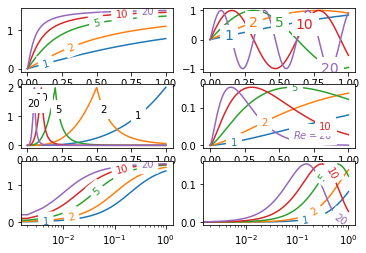

In [51]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.stats import loglaplace,chi2

from labellines import labelLine, labelLines

X = np.linspace(0,1,500)
A = [1,2,5,10,20]
funcs = [np.arctan,np.sin,loglaplace(4).pdf,chi2(5).pdf]

plt.subplot(321)
for a in A:
    plt.plot(X,np.arctan(a*X),label=str(a))

labelLines(plt.gca().get_lines(),zorder=2.5)

plt.subplot(322)
for a in A:
    plt.plot(X,np.sin(a*X),label=str(a))

labelLines(plt.gca().get_lines(),align=False,fontsize=14)

plt.subplot(323)
for a in A:
    plt.plot(X,loglaplace(4).pdf(a*X),label=str(a))

xvals = [0.8,0.55,0.22,0.104,0.045]
labelLines(plt.gca().get_lines(),align=False,xvals=xvals,color='k')

plt.subplot(324)
for a in A:
    plt.plot(X,chi2(5).pdf(a*X),label=str(a))

lines = plt.gca().get_lines()
l1=lines[-1]
labelLine(l1,0.6,label=r'$Re=${}'.format(l1.get_label()),ha='left',va='bottom',align = False)
labelLines(lines[:-1],align=False)

# labelLines also supports log-scaled x-axes
plt.subplot(325)
for a in A:
    plt.semilogx(X,np.arctan(5*a*X),label=str(a))

labelLines(plt.gca().get_lines(),zorder=2.5)

plt.subplot(326)
for a in A:
    plt.semilogx(X,chi2(5).pdf(a*X),label=str(a))

labelLines(plt.gca().get_lines(), xvals=(0.1, 1), zorder=2.5)

plt.show()


dimension of the sample = 325, 325, 1
n_sample_pixel = 50918
finite support area ratio in sample = 0.482


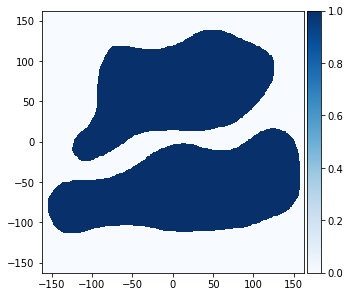

In [40]:
from util import *
import matplotlib.pyplot as plt
import numpy as np
import dxchange
import os
from mpl_toolkits.axes_grid1 import make_axes_locatable


grid_delta = np.load('cell/ptychography/phantom/grid_delta.npy')
print('dimension of the sample = ' + ', '.join(map(str, grid_delta.shape)))

n_sample_pixel = np.count_nonzero(grid_delta > 1e-10)
print('n_sample_pixel = %d' % n_sample_pixel)
print('finite support area ratio in sample = %.3f' % (n_sample_pixel / (grid_delta.shape[0] * grid_delta.shape[1])))


finite_support = (grid_delta > 1e-10).astype('float')
fig, ax = plt.subplots(figsize=(5,5), ncols =1, nrows=1)
pos = ax.imshow(finite_support[:,:,0], cmap='Blues', interpolation='none', extent=[-finite_support.shape[1]/2., finite_support.shape[1]/2., -finite_support.shape[0]/2., finite_support.shape[0]/2.])
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
fig.colorbar(pos, cax=cax)

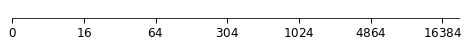

In [146]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

def setup(ax):
    ax.spines['right'].set_color('none')
    ax.spines['left'].set_color('none')
    ax.yaxis.set_major_locator(ticker.NullLocator())
    ax.spines['top'].set_color('none')
    ax.xaxis.set_ticks_position('bottom')
    ax.tick_params(which='major', width=1.00)
    ax.tick_params(which='major', length=5)
    ax.tick_params(which='minor', width=0.75)
    ax.tick_params(which='minor', length=2.5)
    ax.set_xlim(0, 5)
    ax.set_ylim(0, 1)
    ax.patch.set_alpha(0.0)
    
plt.figure(figsize=(8, 2))
n = 8

ax = plt.subplot(n, 1, 8)
setup(ax)
ax.set_xlim(0, 17000)
xticks = np.arange(0,19000,np.round(16384/6))


#ax.set_xscale('log')
#ax.xaxis.set_major_locator(ticker.LogLocator(base=10.0, numticks=15))
#ax.text(0.0, 0.1, "LogLocator(base=10, numticks=15)", fontsize=15, transform=ax.transAxes)
#ax.annotate(' ', va='center', xy=(18900, 0), xytext=(16384, 0), arrowprops=dict(facecolor='black', shrink=0.05, width=0.05))
ax.set_xticks(xticks)
ax.set_xticklabels(('$0$','$16$','$64$','$304$','$1024$','$4864$','$16384$'), fontsize=12)
plt.show()

6

In [112]:
round(16384/6)*6

16386